<a href="https://colab.research.google.com/github/drstannwoji2019/SCM_Forecasting/blob/main/ClassificationModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate synthetic binary classification data
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the first deep learning model
model1 = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Define the second deep learning model
model2 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the models
model1.compile(optimizer='adam', loss='binary_crossentropy')
model2.compile(optimizer='adam', loss='binary_crossentropy')

# Train the models
model1.fit(X_train, y_train, epochs=50, verbose=0)
model2.fit(X_train, y_train, epochs=50, verbose=0)


In [3]:
# Predict the probabilities for the test data
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)

# Ensemble model (averaging)
y_pred_ensemble = (y_pred1 + y_pred2) / 2


7/7 [==============================] - 0s 2ms/step


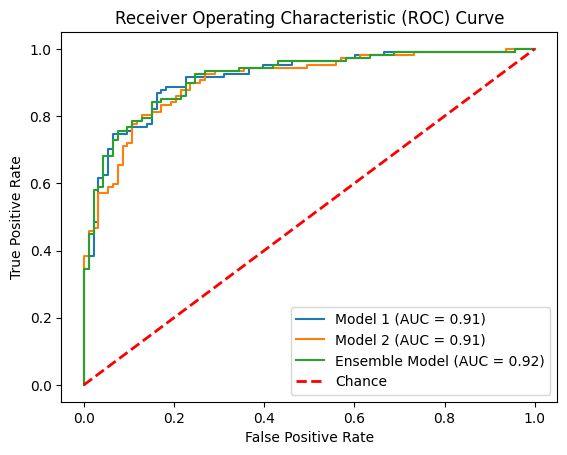

In [5]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute the ROC curve and the AUC score for the individual models and the ensemble model
fpr1, tpr1, _ = roc_curve(y_test, y_pred1)
fpr2, tpr2, _ = roc_curve(y_test, y_pred2)
fpr_ensemble, tpr_ensemble, _ = roc_curve(y_test, y_pred_ensemble)

# Compute the AUC scores
auc1 = auc(fpr1, tpr1)
auc2 = auc(fpr2, tpr2)
auc_ensemble = auc(fpr_ensemble, tpr_ensemble)

# Plot the ROC curves
plt.plot(fpr1, tpr1, label=f'Model 1 (AUC = {auc1:.2f})')
plt.plot(fpr2, tpr2, label=f'Model 2 (AUC = {auc2:.2f})')
plt.plot(fpr_ensemble, tpr_ensemble, label=f'Ensemble Model (AUC = {auc_ensemble:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()